U ovoj liniji, uvozimo modul requests, koji se koristi za slanje HTTP zahteva. Takođe, uvozimo funkciju urlopen iz modula urllib.request, koja se takođe koristi za otvaranje URL-ova, ali koristi se manje često u poređenju sa requests.

In [248]:
import requests
from urllib.request import urlopen


Ovi redovi koda se koriste za uvoz potrebnih biblioteka. Prvi red uvozi BeautifulSoup, koji je biblioteka za parsiranje HTML i XML dokumenata, dok drugi red uvozi pandas, koji je popularna biblioteka za analizu i manipulaciju podacima, posebno tabularnim podacima. Ovi moduli su neophodni za dalje rad sa HTML dokumentima i podacima.

In [249]:
from bs4 import BeautifulSoup
import pandas as pd

In [250]:
url = "https://www.basketball-reference.com/playoffs/"


In [251]:
html = urlopen(url)
soup = BeautifulSoup(html, features="lxml")

Ovaj red koda koristi BeautifulSoup da bi pronašao zaglavlje tabele u HTML dokumentu. On prolazi kroz prva dva reda i izdvaja zaglavlja kolona tabele. Funkcija getText() se koristi da bi se izvukao tekst iz svakog zaglavlja kolone. Na kraju, ovi tekstovi se čuvaju u listi pod nazivom headers.

In [252]:
headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]

Ova linija koda prolazi kroz sve redove nakon prvog i drugog (počinjući od trećeg reda) u HTML dokumentu i izdvaja podatke iz svake ćelije (<td>) u tim redovima. Svaki red se pretvara u listu koja sadrži tekst iz svake ćelije. Svi ovi redovi se zatim grupišu u listu rows_data.

In [253]:
rows = soup.findAll('tr')[2:]
rows_data = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]


Ova petlja prolazi kroz sve elemente u listi rows_data i dodaje godinu (počevši od last_year i smanjujući je za 1 za svaki sledeći red) na početak svakog podlista. Ovo se radi kako bi se svakom redu dodala informacija o godini, koja nije bila dostupna na veb stranici, ali je pretpostavljeno da se podaci odnose na godine unazad od 2024.

In [254]:
last_year = 2024
for i in range(0, len(rows_data)):
    rows_data[i].insert(0, last_year)
    last_year -= 1

In [255]:
column_names = headers


In [256]:
print("\t".join(column_names))
for row in rows_data[1:]:
    print(row)

Year	Lg	Champion	Runner-Up	Finals MVP	 	Points	Rebounds	Assists	Win Shares
[2023, 'NBA', 'Denver Nuggets', 'Miami Heat', 'N. Jokić', '', 'N. Jokić (600)', 'N. Jokić (269)', 'N. Jokić (190)', 'N. Jokić (5.0)']
[2022, 'NBA', 'Golden State Warriors', 'Boston Celtics', 'S. Curry', '', 'J. Tatum (615)', 'A. Horford (214)', 'J. Tatum (148)', 'J. Butler (3.8)']
[2021, 'NBA', 'Milwaukee Bucks', 'Phoenix Suns', 'G. Antetokounmpo', '', 'G. Antetokounmpo (634)', 'G. Antetokounmpo (269)', 'J. Holiday (199)', 'G. Antetokounmpo (3.7)']
[2020, 'NBA', 'Los Angeles Lakers', 'Miami Heat', 'L. James', '', 'A. Davis (582)', 'L. James (226)', 'L. James (184)', 'A. Davis (4.5)']
[2019, 'NBA', 'Toronto Raptors', 'Golden State Warriors', 'K. Leonard', '', 'K. Leonard (732)', 'D. Green (223)', 'D. Green (187)', 'K. Leonard (5.0)']
[2018, 'NBA', 'Golden State Warriors', 'Cleveland Cavaliers', 'K. Durant', '', 'L. James (748)', 'D. Green (222)', 'L. James (198)', 'L. James (5.2)']
[2017, 'NBA', 'Golden State War

Ovde se uvoze biblioteke matplotlib.pyplot i defaultdict iz modula collections. Biblioteka matplotlib.pyplot koristi se za crtanje grafikona, dok se defaultdict koristi za olakšavanje rada s praznim rečnicima, pružajući podrazumevane vrednosti ako ključ ne postoji.










In [292]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [293]:
data = rows_data[1:]  # Skip the header row


Ovde se kreiraju prazni rečnici koristeći defaultdict iz modula collections. team_wins će pratiti broj pobeda timova, player_mvps će pratiti broj osvojenih nagrada za najkorisnijeg igrača (MVP) igrača, a team_runner_ups će pratiti broj puta kada je tim bio vicešampion. Sve vrednosti su postavljene na 0, a ako se kasnije dodaju nove vrednosti, defaultdict će se automatski proširiti kako bi ih uključio.

In [297]:
team_wins = defaultdict(int)
player_mvps = defaultdict(int)
team_runner_ups = defaultdict(int)


Ovde se iterira kroz podatke data. Za svaki red se proverava da li ima tačno 10 elemenata. Ako ima, podaci se raspakuju u odgovarajuće promenljive. Nakon toga se povećavaju brojači za pobede timova (team_wins), pojavljivanje vicešampiona (team_runner_ups) i broja MVP-ova (player_mvps). Ako postoji MVP za finale (finals_mvp), brojač za tog igrača se povećava.

In [298]:
for row in data:
    # Ensure the row has exactly 10 elements
    if len(row) == 10:
        year, league, champion, runner_up, finals_mvp, _, points, rebounds, assists, win_shares = row

        # Count finals wins
        team_wins[champion] += 1

        # Count runner-up appearances
        team_runner_ups[runner_up] += 1

        # Count Finals MVPs
        if finals_mvp:
            player_mvps[finals_mvp] += 1

Ovde se sortiraju rečnici team_wins, team_runner_ups i player_mvps po vrednostima u opadajućem redosledu. Rezultat je lista torki gde je prvi element ime tima ili igrača, a drugi element je broj pobeda, vicešampionskih pojavljivanja ili broj osvojenih nagrada za najkorisnijeg igrača finala, redom. Funkcija sorted() se koristi sa argumentom key koji je lambda funkcija koja ekstrahuje vrednost za sortiranje (po drugom elementu tuple-a), a reverse=True se koristi kako bi sortiranje bilo u opadajućem redosledu.

In [299]:
sorted_team_wins = sorted(team_wins.items(), key=lambda x: x[1], reverse=True)
sorted_team_runner_ups = sorted(team_runner_ups.items(), key=lambda x: x[1], reverse=True)
sorted_player_mvps = sorted(player_mvps.items(), key=lambda x: x[1], reverse=True)


In [300]:
teams, wins = zip(*sorted_team_wins)


Ovde se kreira horizontalni stubičasti dijagram koji prikazuje timove sa najviše osvojenih finala. Svaki stubić predstavlja broj pobeda tima u finalima. plt.barh() se koristi za crtanje horizontalnih stubića, gde su argumenti teams nazivi timova i wins broj pobeda tih timova. Parametar color='skyblue' postavlja boju stubića na svetlo plavu. plt.xlabel() i plt.ylabel() postavljaju oznake na x i y ose, dok plt.title() postavlja naslov dijagrama. plt.gca().invert_yaxis() se koristi za invertovanje y-ose kako bi tim sa najviše pobeda bio prikazan na vrhu. Na kraju, plt.show() se koristi za prikaz dijagrama.

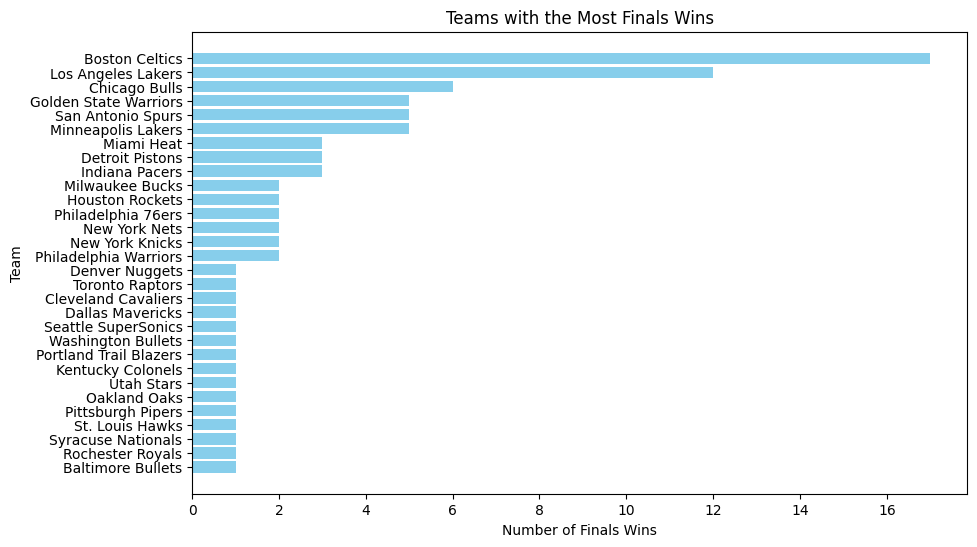

In [301]:
plt.figure(figsize=(10, 6))
plt.barh(teams, wins, color='skyblue')
plt.xlabel('Number of Finals Wins')
plt.ylabel('Team')
plt.title('Teams with the Most Finals Wins')
plt.gca().invert_yaxis()  # Invert y-axis to show the team with the most wins at the top
plt.show()

In [302]:
teams_runner_ups, runner_ups = zip(*sorted_team_runner_ups)


Isto kao i za winners vazi i za runner ups i final mvps

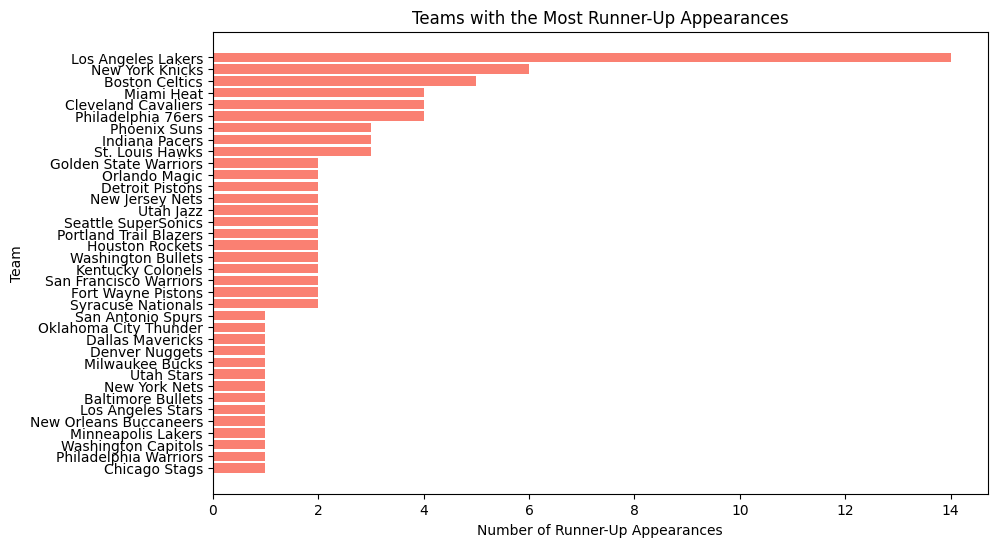

In [303]:
plt.figure(figsize=(10, 6))
plt.barh(teams_runner_ups, runner_ups, color='salmon')
plt.xlabel('Number of Runner-Up Appearances')
plt.ylabel('Team')
plt.title('Teams with the Most Runner-Up Appearances')
plt.gca().invert_yaxis()  # Invert y-axis to show the team with the most runner-up appearances at the top
plt.show()

In [304]:
players, mvps = zip(*sorted_player_mvps)


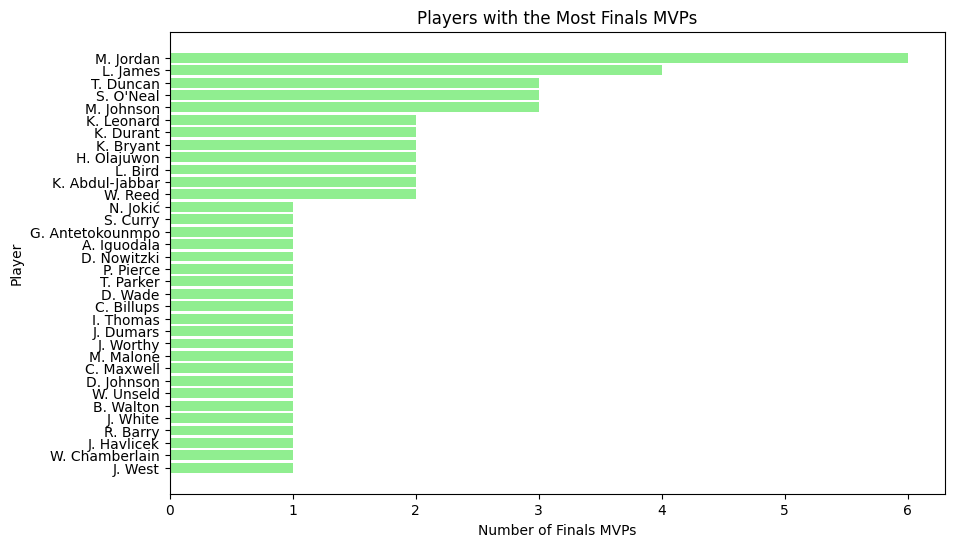

In [305]:
plt.figure(figsize=(10, 6))
plt.barh(players, mvps, color='lightgreen')
plt.xlabel('Number of Finals MVPs')
plt.ylabel('Player')
plt.title('Players with the Most Finals MVPs')
plt.gca().invert_yaxis()
plt.show()

In [329]:
matchup_counts = {}


Ovaj deo koda prolazi kroz svaki red podataka i proverava da li svaki red ima tačno 10 elemenata. Ako ima, izvlače se relevantni podaci kao što su godina, liga, šampion, vicešampion, najkorisniji igrač finala, poeni, skokovi, asistencije i deljeni poeni pobede. Zatim se formira par (matchup) sa šampionom i vicešampionom, gde se timovi sortiraju po abecedi kako bi se izbegle duplicirane kombinacije kao što su ('Tim A', 'Tim B') i ('Tim B', 'Tim A'). Ako je matchup već u matchup_counts, povećava se broj mečeva za taj matchup za 1, u suprotnom se dodaje novi matchup u matchup_counts sa vrednošću 1. Ako red ima više ili manje od 10 elemenata, ispisuje se poruka o preskakanju reda sa neočekivanim brojem elemenata.

In [330]:
for row in data:
    # Ensure the row has exactly 10 elements
    if len(row) == 10:
        year, league, champion, runner_up, finals_mvp,_, points, rebounds, assists, winshares = row
        matchup = tuple(sorted([champion, runner_up]))
        if matchup in matchup_counts:
            matchup_counts[matchup] += 1
        else:
            matchup_counts[matchup] = 1
    else:
        print(f"Skipping row with unexpected number of elements: {row}")

Skipping row with unexpected number of elements: [2004, '']
Skipping row with unexpected number of elements: [1983, '']
Skipping row with unexpected number of elements: [1962, '']
Skipping row with unexpected number of elements: [1941, '']


Ovaj deo koda kreira DataFrame koristeći biblioteku pandas. Pravi se DataFrame df koji sadrži podatke u formatu tabele sa nazivima kolona "Year", "League", "Champion", "Runner-Up", "Finals MVP", "Dummy", "Points", "Rebounds", "Assists" i "Win Shares". Podaci se uzimaju iz promenljive data.

In [318]:
df = pd.DataFrame(data, columns=['Year', 'League', 'Champion', 'Runner-Up', 'Finals MVP', 'Dummy', 'Points', 'Rebounds', 'Assists', 'Win Shares'])


Ova linija koda koristi dropna() metodu na DataFrame-u df kako bi se uklonili redovi koji sadrže nedostajuće vrednosti (NaN). Postavljanje inplace=True znači da će izmena biti primenjena na sam DataFrame, umesto da se vrati novi DataFrame.








In [319]:
df.dropna(inplace=True)


In [321]:
# Get unique team names
teams = pd.concat([df['Champion'], df['Runner-Up']]).unique()


Ova linija koda kreira prazan neusmereni graf koristeći biblioteku NetworkX. nx.Graph() stvara objekat koji može da predstavlja graf i manipuliše njime. Ovaj graf ne sadrži čvorove ili grane, već se koristi kao početna tačka za dodavanje čvorova i grana

In [322]:
G = nx.Graph()


Ova linija koda dodaje čvorove u graf G. Funkcija add_nodes_from dodaje čvorove iz zadate liste teams u graf. Svaki čvor predstavlja tim koji je učestvovao u NBA finalu ili bio finalista.








In [323]:
G.add_nodes_from(teams)


Ova linija koda koristi groupby funkciju iz Pandas biblioteke kako bi se grupisali podaci prema kolonama "Champion" i "Runner-Up". Zatim se primenjuje funkcija size() koja broji broj pojavljivanja svake kombinacije. Rezultat se čuva u DataFrame objektu matchup_counts, gde su kolone "Champion" i "Runner-Up" kombinacije timova koji su se sastali u finalu, a "Count" predstavlja broj puta koliko se ta kombinacija pojavila.

In [324]:
matchup_counts = df.groupby(['Champion', 'Runner-Up']).size().reset_index(name='Count')


Ova petlja prolazi kroz svaki red DataFrame-a matchup_counts pomoću metode iterrows(). Za svaki red, uzimamo vrednosti u kolonama "Champion", "Runner-Up" i "Count" i dodajemo grane u graf G između timova koji su igrali u finalu. Te grane se dodaju sa težinom koji odgovara broju puta kada su se ti timovi sastali u finalu.

In [325]:
for _, row in matchup_counts.iterrows():
    team1 = row['Champion']
    team2 = row['Runner-Up']
    count = row['Count']
    G.add_edge(team1, team2, weight=count)

Ovaj kod crta graf koji prikazuje broj puta kada su se različiti timovi sastali u finalu. Pozicije čvorova se određuju pomoću spring_layout algoritma, a zatim se koriste te pozicije za crtanje grafa pomoću funkcije nx.draw. Čvorovi su označeni imenima timova, dok su ivice između čvorova označene debljinom koja odgovara broju finalnih susreta između tih timova. Osim toga, graf nema ose i koristi se boja i stil za bolju čitljivost.








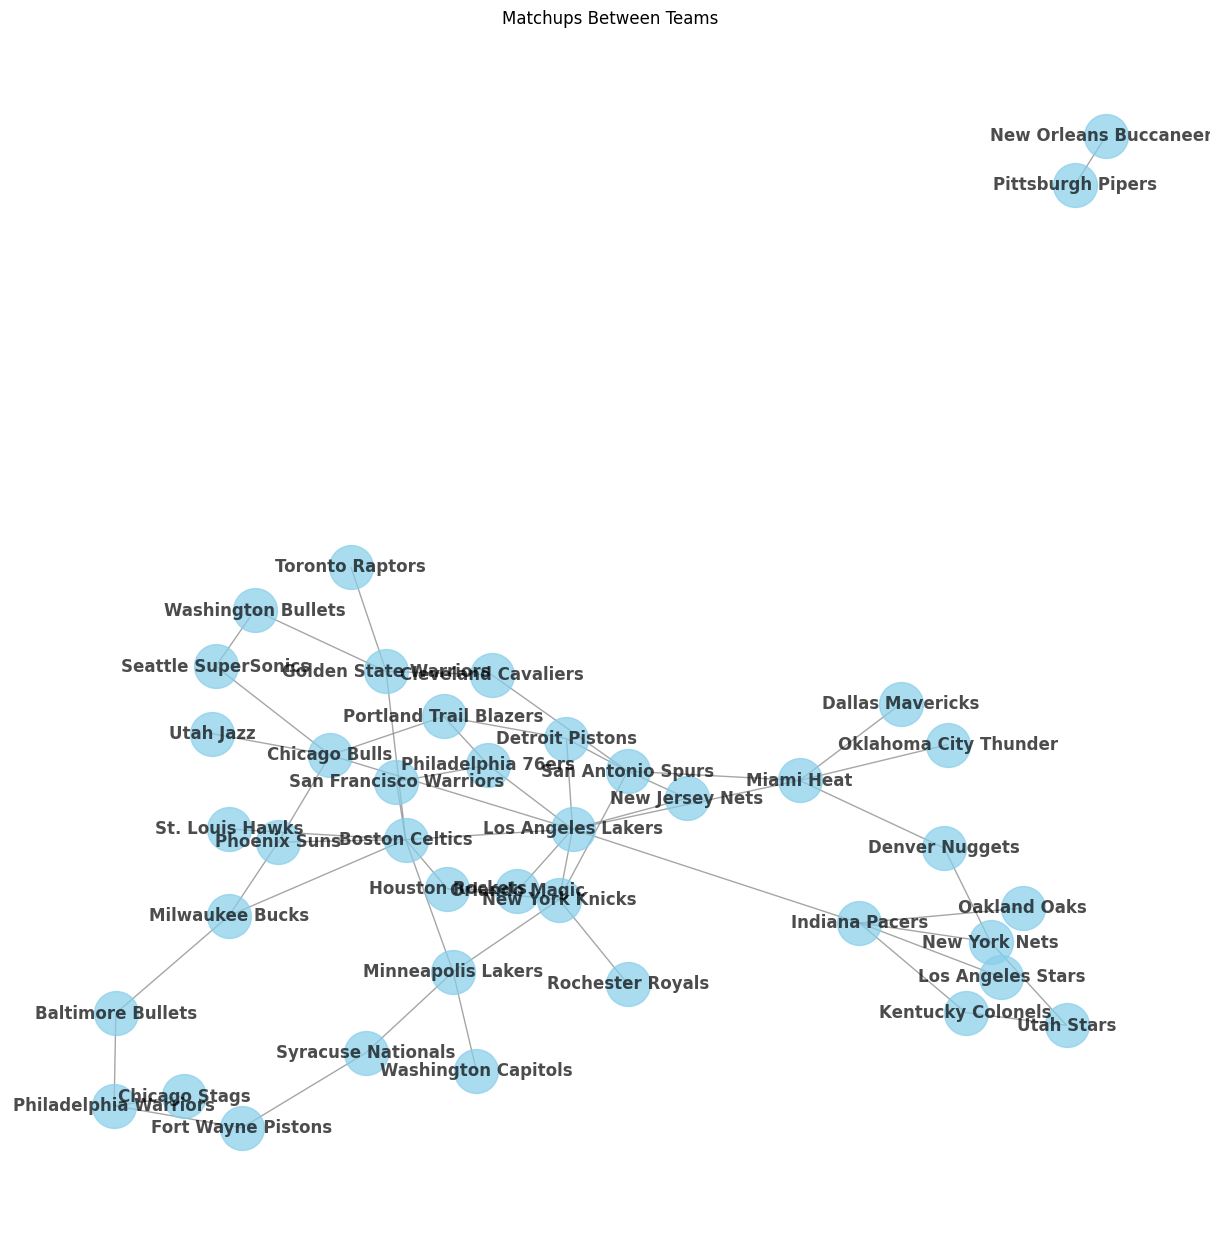

In [327]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Position nodes using a spring layout
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray', width=1, alpha=0.7)
plt.title('Matchups Between Teams')
plt.axis('off')
plt.show()

In [328]:
nx.write_gexf(G, "matchups_graph.gexf")
